## Script for MultiTaper Method-Singular Value Decomposition (MTM-SVD) with Monte Carlo test in python

------------------------------------------------------------------

This script is a modified version of the Python function developed by
Mathilde Jutras at McGill University, Canada[1]. 
You can find the original Python code here: 
https://github.com/mathildejutras/mtm-svd-python

This script was adapted by Yitao Liu at Nanjing University of Information Science & Technology, China
Copyright (C) 2021, Yitao Liu
and is available under the GNU General Public License v3.0

The script may be used, copied, or redistributed as long as it is cited as follow:
[]

This software may be used, copied, or redistributed as long as it is not 
sold and that this copyright notice is reproduced on each copy made. 
This routine is provided as is without any express or implied warranties.

Questions or comments to:
Yitao Liu, liuyitao97@outlook.com

Last update:
Dec 2021

------------------------------------------------------------------

The script is structured as follows:

In the main script is found in mtm-svd-python.py
In the first section, the user can load the data,
assuming the outputs are stored in a netcdf format.
In the secton section, functions are called to calculate the spectrum
The user will then be asked for which frequencies he wants to plot 
the spatial patterns associated with the variability.
In the third section, the spatial patterns are plotted and saved

The required functions are found in mtm_functions.py

------------------------------------------------------------------

Python Package needed:
- numpy
- scipy
- xarray (read the netcdf file)
- matplotlib (not necessary, just for plotting)

You can install the needed Python packages by conda,with the command below
```
conda install -c conda-forge numpy scipy xarray matplotlib
```

[1] Mathilde Jutras. (2020, July 6). mathildejutras/mtm-svd-python: v1.0.0-alpha (Version v1.0.0). Zenodo. http://doi.org/10.5281/zenodo.3932319

In [1]:
from mtm_functions import *
import xarray as xr
# from os import listdir
from os import system
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time

# Load the data

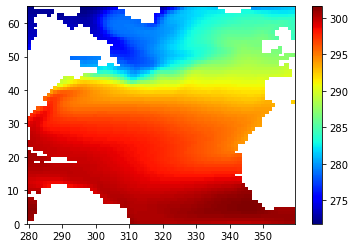

<Figure size 432x288 with 0 Axes>

In [2]:
# the data used in this sample is the SST of CMIP5 CCSM4 piControl
file_path = 'tos_1x1_CCSM4_piControl.nc'
# Select the depth, in m
d = 0 
model = 'CCSM4' # name of the model, for naming the output

var = xr.open_dataset(file_path)['tos'].loc[:,0:65,280:360]
dt = 1. # time step in years
lon = var.lon
lat = var.lat
# var = var.sel(NAME_DEPTH_VARIABLE=d, method='nearest').values

# Plot map of the variable
xgrid, ygrid = np.meshgrid(lon,lat)
plt.pcolor(xgrid, ygrid, var[0,:,:], cmap='jet')
cbar=plt.colorbar()
plt.savefig(f'Figs/{model}_data_first_timestep.jpg')
plt.show()
plt.clf()

# Compute the LVF


In [3]:
# Slepian tapers
nw = 2; # bandwidth
kk = 3; # number of orthogonal windows

# Select the frequence that need & make it a xr.DataArray
# freq >= 0.01 means period shorter than 100 years
# freq <= 0.1 means period longer than 10 years
freq_band = [0.01,0.1] # depends on the study

# Reshape the 2d array to a 1d array
o2 = var.copy().values.astype(np.float32)
o2ts = o2.reshape((o2.shape[0],o2.shape[1]*o2.shape[2]), order='F')
p, n = o2ts.shape

# Compute the LFV
[freq, lfv] = mtm_svd_lfv(o2ts,nw,kk,dt)

freq_sel_index = np.where((freq>=freq_band[0]) & (freq<=freq_band[1]))
freq_sel = freq[freq_sel_index]
lfv_sel = lfv[freq_sel_index]

/Users/liuyitao/Projects_Data/project/-AMO_AMOC-MTM-SVD/mtm_functions.py:74: RuntimeWarning: Mean of empty slice
  vm = np.nanmean(ts2d, axis=0) # mean
/usr/local/Caskroom/mambaforge/base/envs/geopy/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


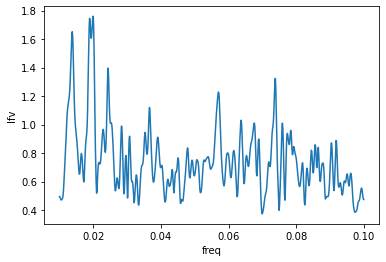

In [4]:
spectrum = xr.DataArray(lfv_sel, coords = [freq_sel], dims=['freq']).rename('lfv')
spectrum.plot()

In [5]:
niter = 1000 # at least 1000
sl = [0.05,0.1,0.3]
T1 = time.time()
[freq, conflevel] = monte_carlo_test(o2ts,niter,sl,len(freq),nw,kk,dt)
T2 = time.time()

freq_sel_index = np.where((freq>=freq_band[0]) & (freq<=freq_band[1]))
freq_sel = freq[freq_sel_index]
conflevel_sel = conflevel[:,freq_sel_index][:,0,:]

niter = 0


/Users/liuyitao/Projects_Data/project/-AMO_AMOC-MTM-SVD/mtm_functions.py:74: RuntimeWarning: Mean of empty slice
  vm = np.nanmean(ts2d, axis=0) # mean
/usr/local/Caskroom/mambaforge/base/envs/geopy/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


niter = 10
niter = 20
niter = 30
niter = 40
niter = 50
niter = 60
niter = 70
niter = 80
niter = 90
niter = 100
niter = 110
niter = 120
niter = 130
niter = 140
niter = 150
niter = 160
niter = 170
niter = 180
niter = 190
niter = 200
niter = 210
niter = 220
niter = 230
niter = 240
niter = 250
niter = 260
niter = 270
niter = 280
niter = 290
niter = 300
niter = 310
niter = 320
niter = 330
niter = 340
niter = 350
niter = 360
niter = 370
niter = 380
niter = 390
niter = 400
niter = 410
niter = 420
niter = 430
niter = 440
niter = 450
niter = 460
niter = 470
niter = 480
niter = 490
niter = 500
niter = 510
niter = 520
niter = 530
niter = 540
niter = 550
niter = 560
niter = 570
niter = 580
niter = 590
niter = 600
niter = 610
niter = 620
niter = 630
niter = 640
niter = 650
niter = 660
niter = 670
niter = 680
niter = 690
niter = 700
niter = 710
niter = 720
niter = 730
niter = 740
niter = 750
niter = 760
niter = 770
niter = 780
niter = 790
niter = 800
niter = 810
niter = 820
niter = 830
niter = 840
n

In [6]:
print('time cost of confidence: %f min' % ((T2 - T1)/60))

time cost of confidence: 163.985367 min


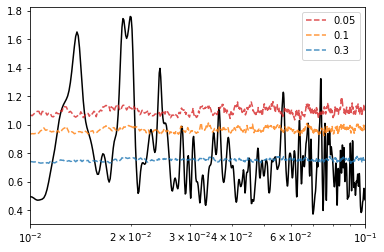

<Figure size 432x288 with 0 Axes>

In [7]:
# Display the plot to allow the user to choose the frequencies associated with peaks
fig = plt.figure(figsize=(6, 4))#,tight_layout=True
gs = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs[0, 0])
ax.semilogx(freq_sel, lfv_sel, '-', c='k')
ax.semilogx(freq_sel, conflevel_sel[0,:], '--', c='tab:red', label=str(sl[0]), alpha=0.8)
ax.semilogx(freq_sel, conflevel_sel[1,:], '--', c='tab:orange', label=str(sl[1]), alpha=0.8)
ax.semilogx(freq_sel, conflevel_sel[2,:], '--', c='tab:blue', label=str(sl[2]), alpha=0.8)
ax.set_xlim([0.01,.1])
ax.legend()
plt.savefig(f'Figs/{model}_spectrum.jpg')
plt.show()
plt.clf()

In [8]:
# save data
conf_dataarray = xr.DataArray(conflevel_sel, coords=[sl, freq_sel], dims=['siglev','freq']).rename('conflev')
ds = xr.Dataset()
ds = ds.merge(spectrum.to_dataset()).merge(conf_dataarray.to_dataset())
system(f'rm -f {model}_lfv_conf.nc')
ds.to_netcdf(f'./{model}_lfv_conf.nc')


# Reconstruct spatial patterns

/Users/liuyitao/Projects_Data/project/-AMO_AMOC-MTM-SVD/mtm_functions.py:198: RuntimeWarning: Mean of empty slice
  vm = np.nanmean(ts2d, axis=0) # mean
/usr/local/Caskroom/mambaforge/base/envs/geopy/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


( 164 ) 0.02 cyclesyr | 49.95 yr
( 410 ) 0.05 cyclesyr | 19.98 yr


/Users/liuyitao/Projects_Data/project/-AMO_AMOC-MTM-SVD/mtm_functions.py:172: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  dum1 = np.linalg.lstsq( np.conj(qrsave1), np.linalg.lstsq( np.conj(qrsave1.T), d )[0] )[0].T
/Users/liuyitao/Projects_Data/project/-AMO_AMOC-MTM-SVD/mtm_functions.py:174: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  dum2 = np.linalg.lstsq( np.conj(qrsave1), np.linalg.lstsq( np.conj(qrsave1.T), za )[0] )[0].T
/Users/liuyitao/Projects_Data/project/-AMO_AMOC-MTM-SVD/mtm_functions.py:180: FutureWarni

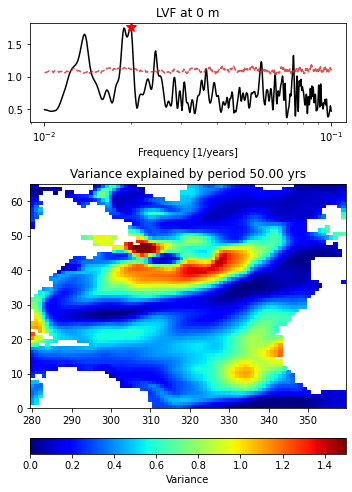

<Figure size 432x288 with 0 Axes>

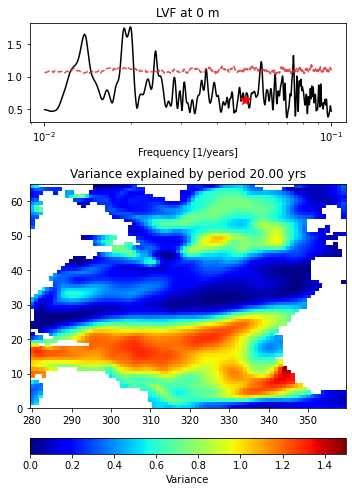

<Figure size 432x288 with 0 Axes>

In [9]:
# Select frequency(ies)
fo = [0.02, 0.05] 
# Calculate the reconstruction

vexp, totvarexp, iis = mtm_svd_recon(o2ts,nw,kk,dt,fo)

# Plot the map for each frequency peak

for i in range(len(fo)):
	RV = np.reshape(vexp[i],xgrid.shape, order='F')
	fig, (ax1, ax2) = plt.subplots(2,1,gridspec_kw={'height_ratios':[1,3]},figsize=(5,7))
	ax1.semilogx(freq_sel, lfv_sel, '-', c='k')
	ax1.semilogx(freq_sel, conflevel_sel[0,:], '--', c='tab:red', label=str(sl[0]), alpha=0.8)
	# ax1.semilogx(freq_sel, conflevel_sel[1,:], '--', c='tab:orange', label=str(sl[1]), alpha=0.8)
	# ax1.semilogx(freq_sel, conflevel_sel[2,:], '--', c='tab:blue', label=str(sl[2]), alpha=0.8)
	ax1.plot(freq[iis[i]],lfv[iis[i]],'r*',markersize=10)
	ax1.set_xlabel('Frequency [1/years]')
	ax1.set_title('LVF at %i m'%d)

	pc = ax2.pcolor(xgrid, ygrid, RV, cmap='jet', vmin=0, vmax=1.5) 
	cbar = fig.colorbar(pc, ax=ax2, orientation='horizontal', pad=0.1)
	cbar.set_label('Variance')
	ax2.set_title('Variance explained by period %.2f yrs'%(1./fo[i]))

	plt.tight_layout()
	plt.savefig(f'Figs/{model}_peak_analysis_%s_%im_%.2fyrs.jpg'%(model,d,1./fo[i]))
	plt.show()
	plt.clf()

